In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [28]:
states_df = pd.read_csv('/Users/Pedro/Documents/Principal/Python/Bootrain Data Science/States_Dataset.csv')

In [29]:
def many_time_plot(col_name, number_rows, number_cols):
    title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
    axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 8 }
    plt.figure(figsize=(50,5), dpi=75)
    
    for i in range(len(states_df['STATE'].unique())-2):# The last 2 states are DODEA & NATIONAL, we won't study them
        
        plt.subplot(number_rows, number_cols, i+1)
        
        plt.plot(states_df[(states_df['STATE']==states_df['STATE'].unique()[i])].loc[:,'YEAR'], 
        states_df[(states_df['STATE']==states_df['STATE'].unique()[i])].loc[:, col_name])
        
        plt.title("State: {}".format(states_df['STATE'].unique()[i]), fontdict = title_font)
        
        plt.xlabel("Year", fontdict = axis_font)
        
        plt.xticks(rotation = 45, fontsize = 8)
        
        plt.ylabel(col_name, fontdict = axis_font)
    
    plt.show()

def many_histogram_plot(col_name, number_rows, number_cols):
    title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
    axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 8 }
    plt.figure(figsize=(50,5), dpi=75)
    
    for i in range(len(states_df['STATE'].unique())-2):# The last 2 states are DODEA & NATIONAL, we won't study them
        
        plt.subplot(number_rows, number_cols, i+1)
        
        plt.hist(states_df[(states_df['STATE']==states_df['STATE'].unique()[i])].loc[:, col_name])
        
        plt.title("State: {}".format(states_df['STATE'].unique()[i]), fontdict = title_font)
        
        plt.xlabel(col_name, fontdict = axis_font)
                
        plt.ylabel("Frecuency", fontdict = axis_font)
    
    plt.show()

In [30]:
print(states_df.head(), '\n')

print(states_df.info(), '\n')

#Here we see the percentage of empty values for each column

print(states_df.isnull().sum()*100/states_df.shape[0], '\n')

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

In [31]:
states_df = states_df.sort_values(by=['YEAR', 'STATE']).reset_index(drop = True) # Sorts the data by YEAR & STATE

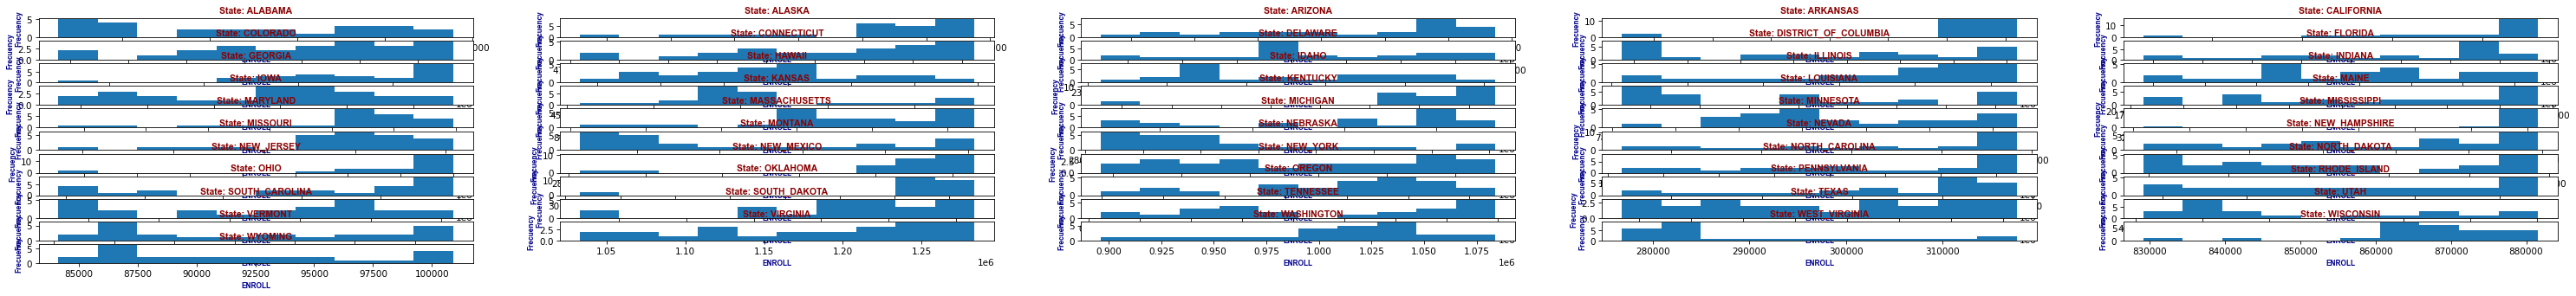

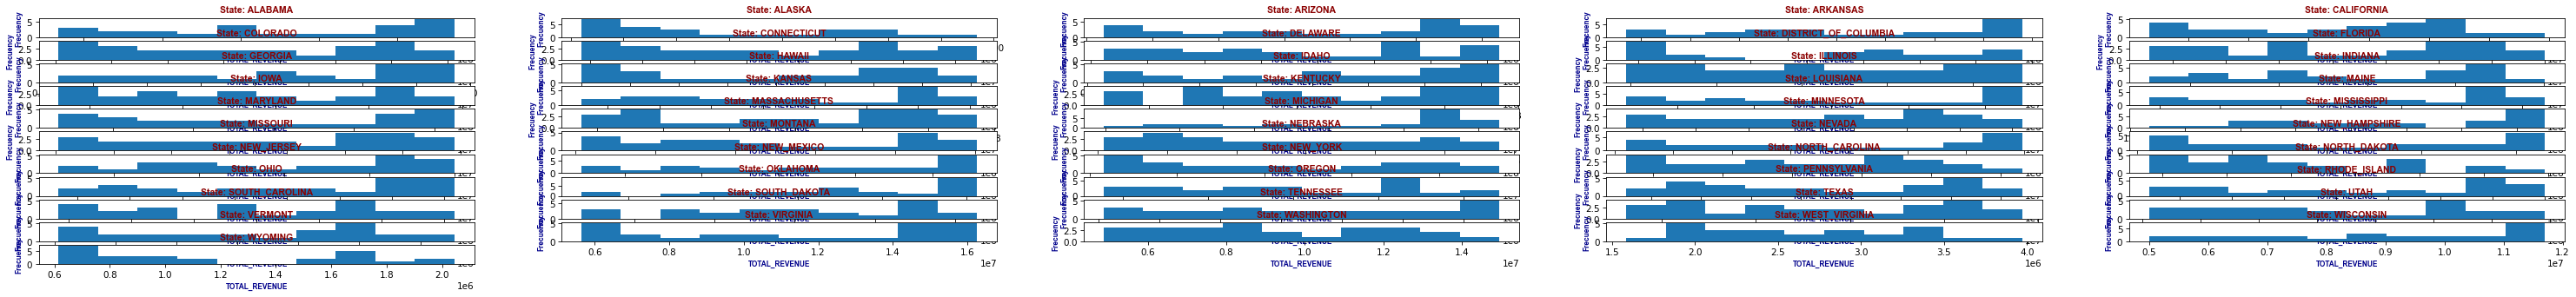

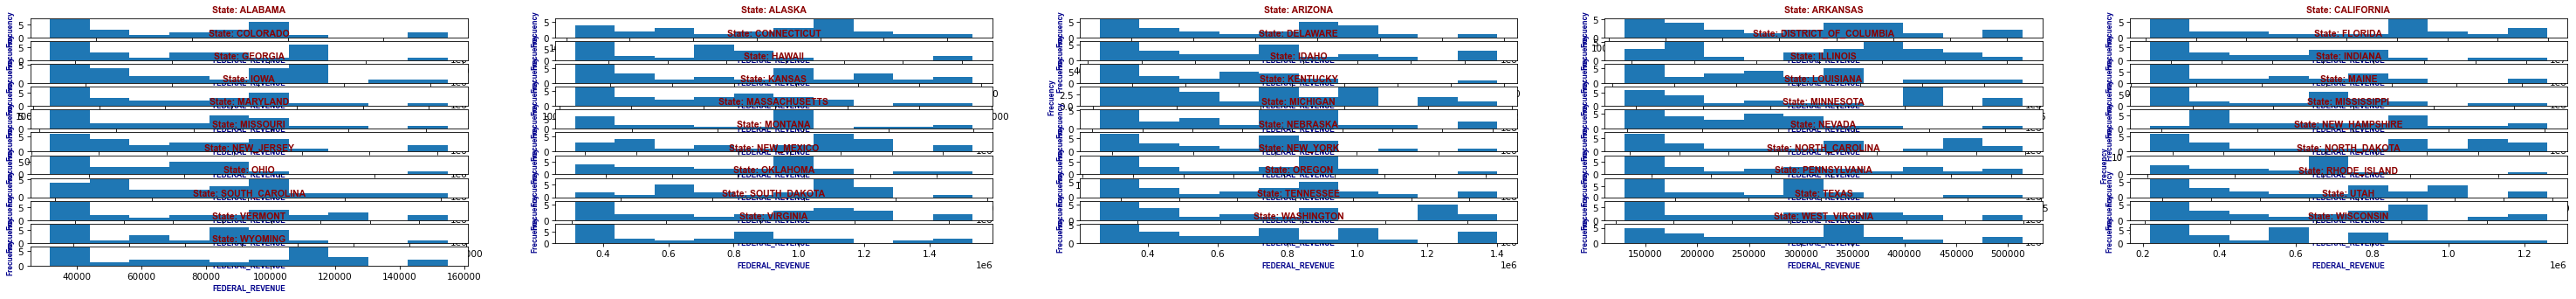

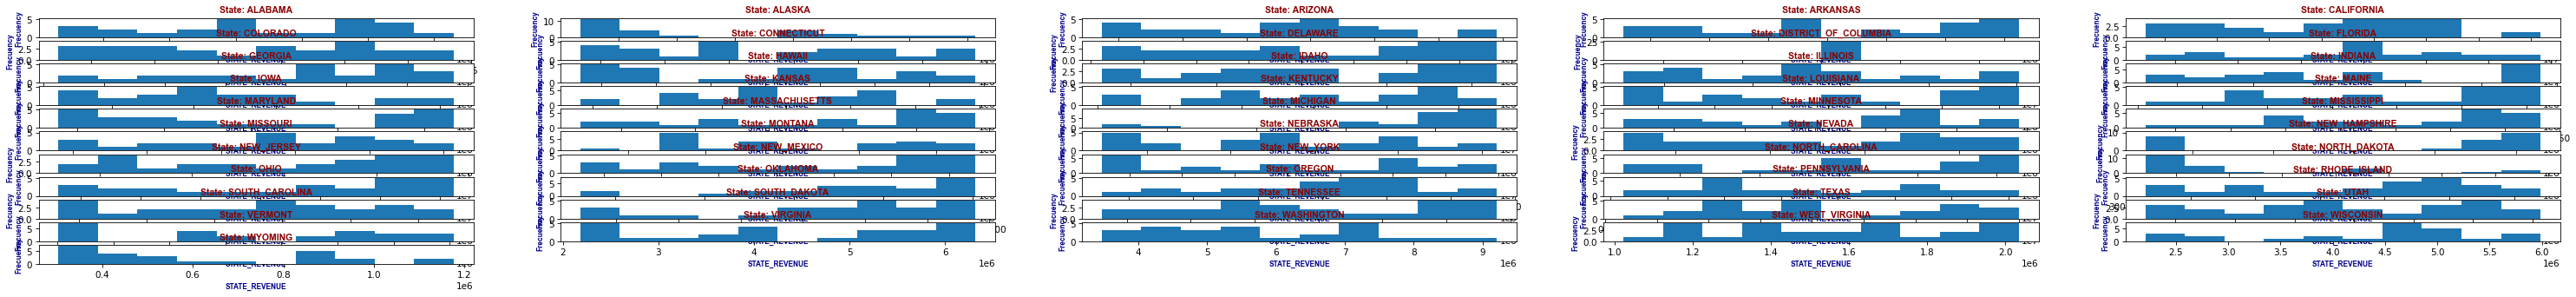

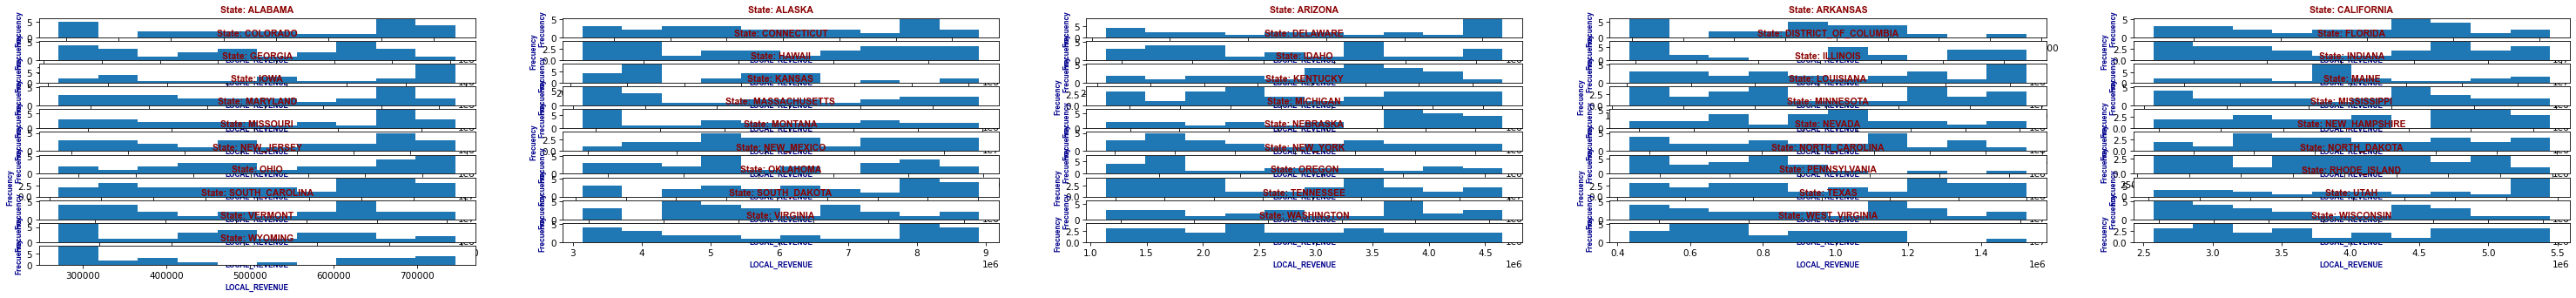

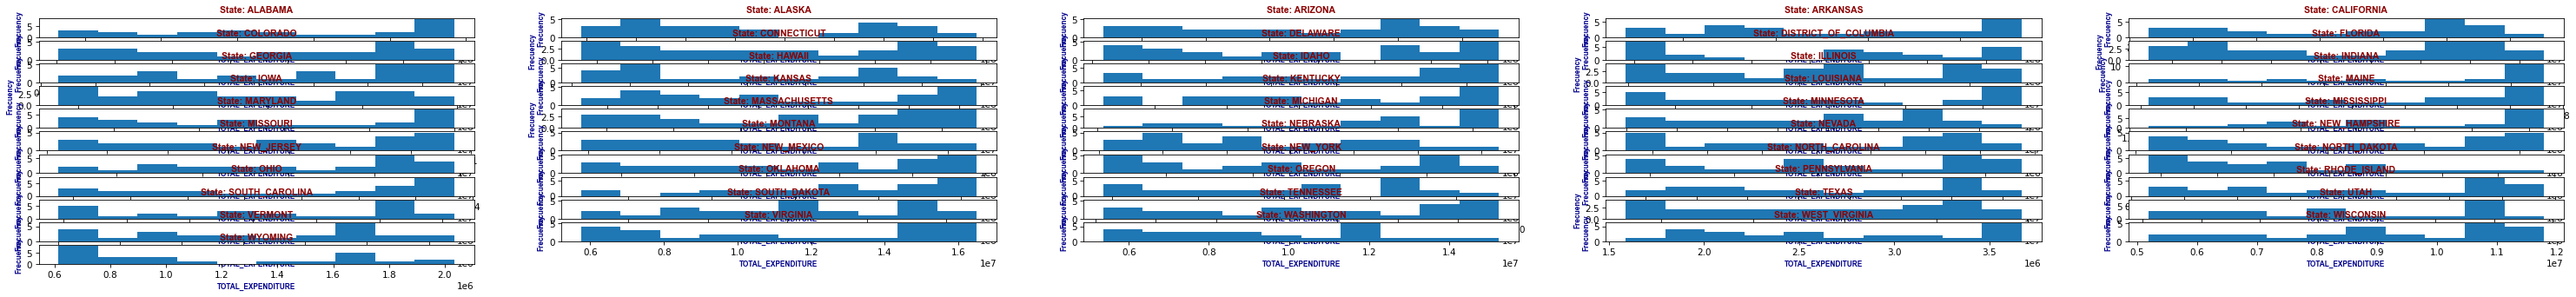

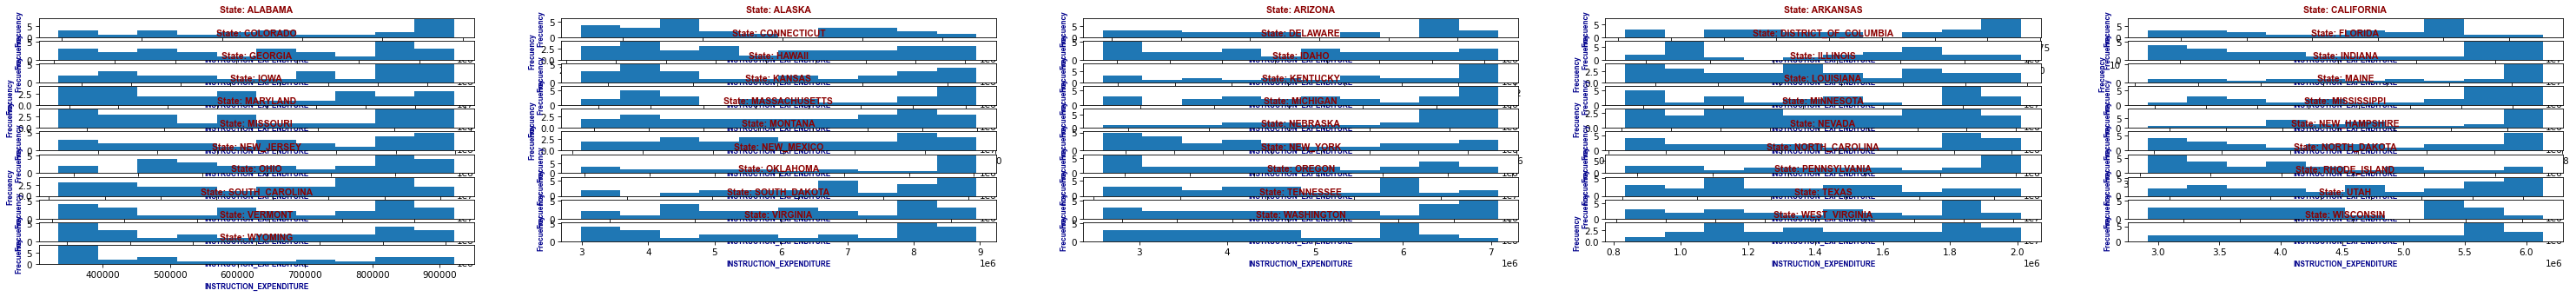

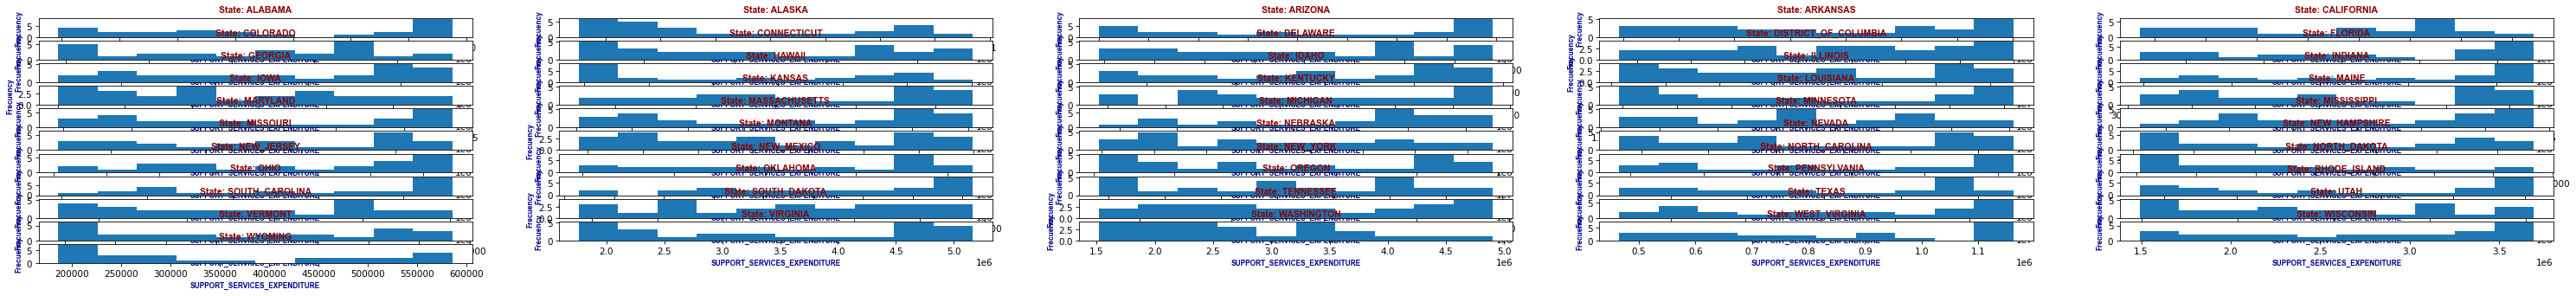

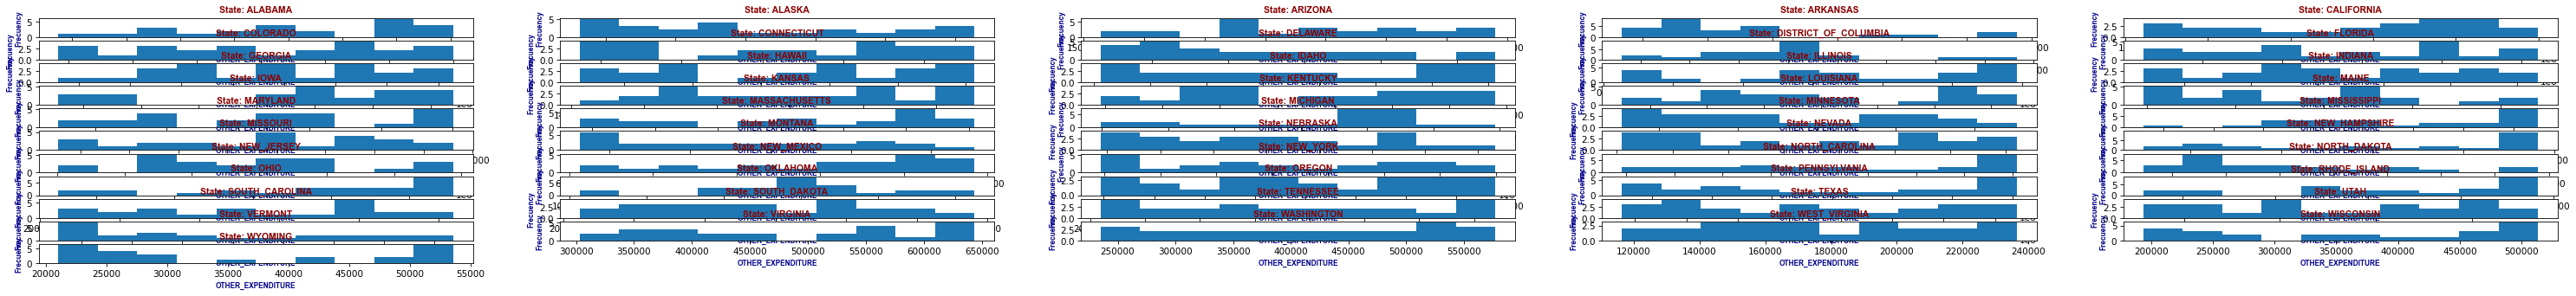

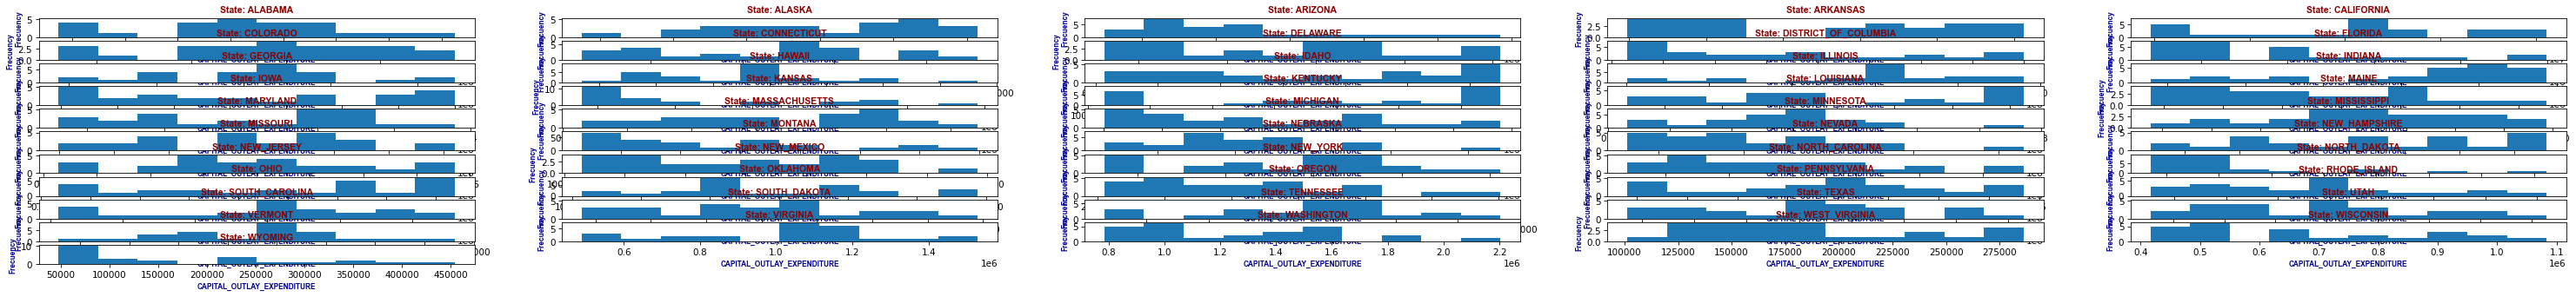

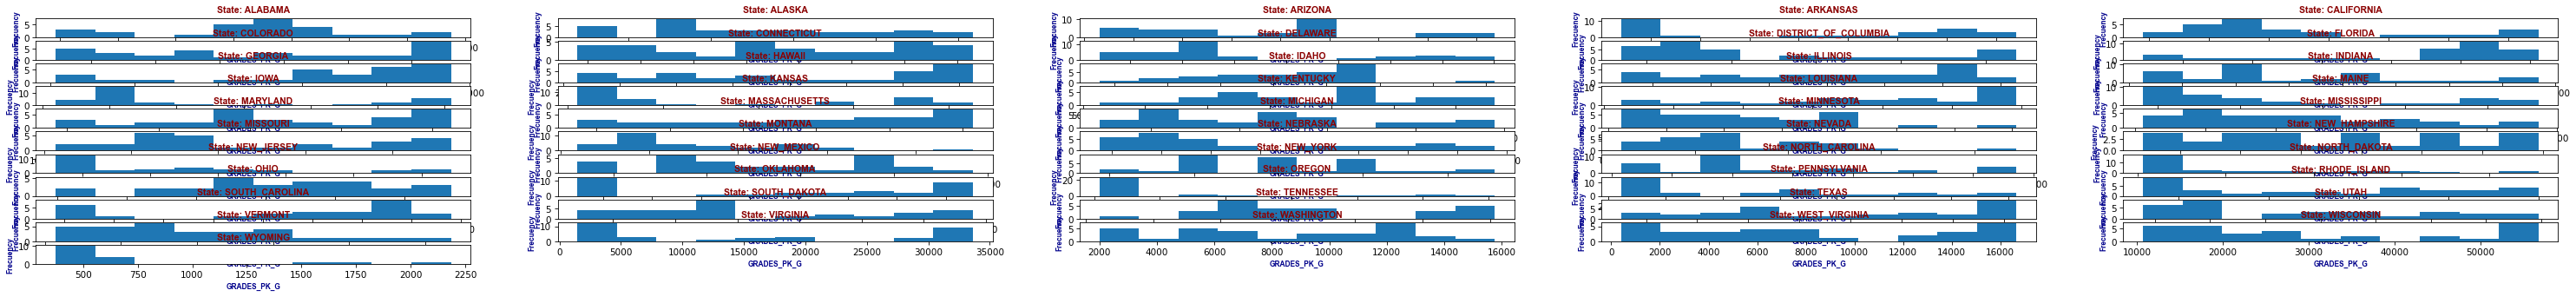

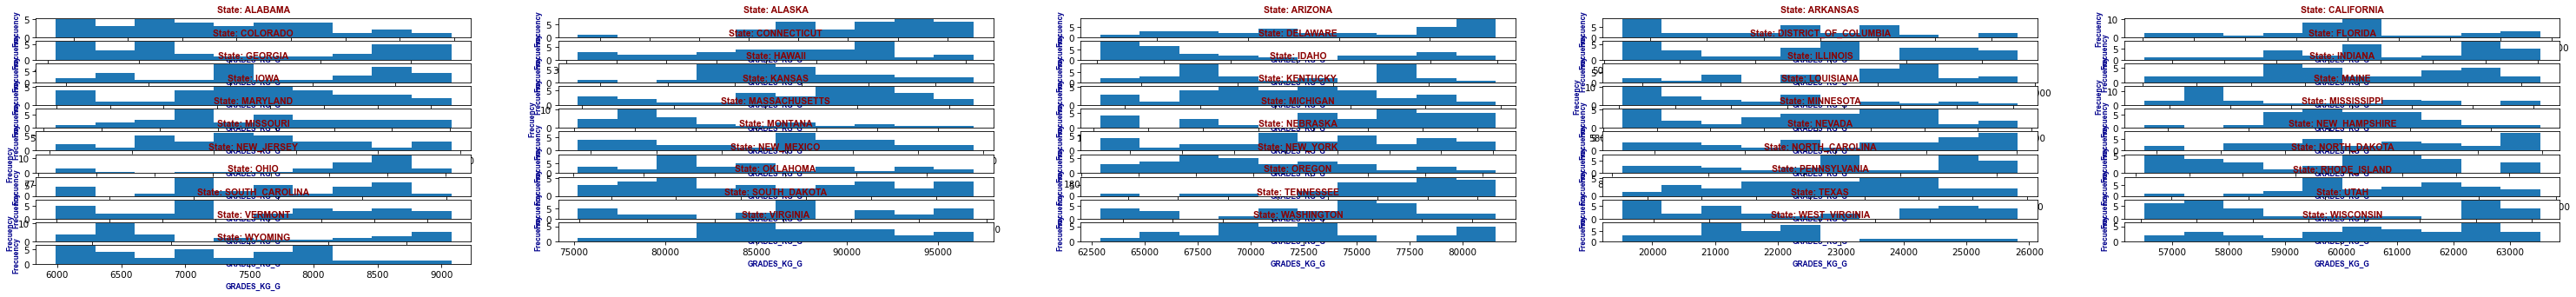

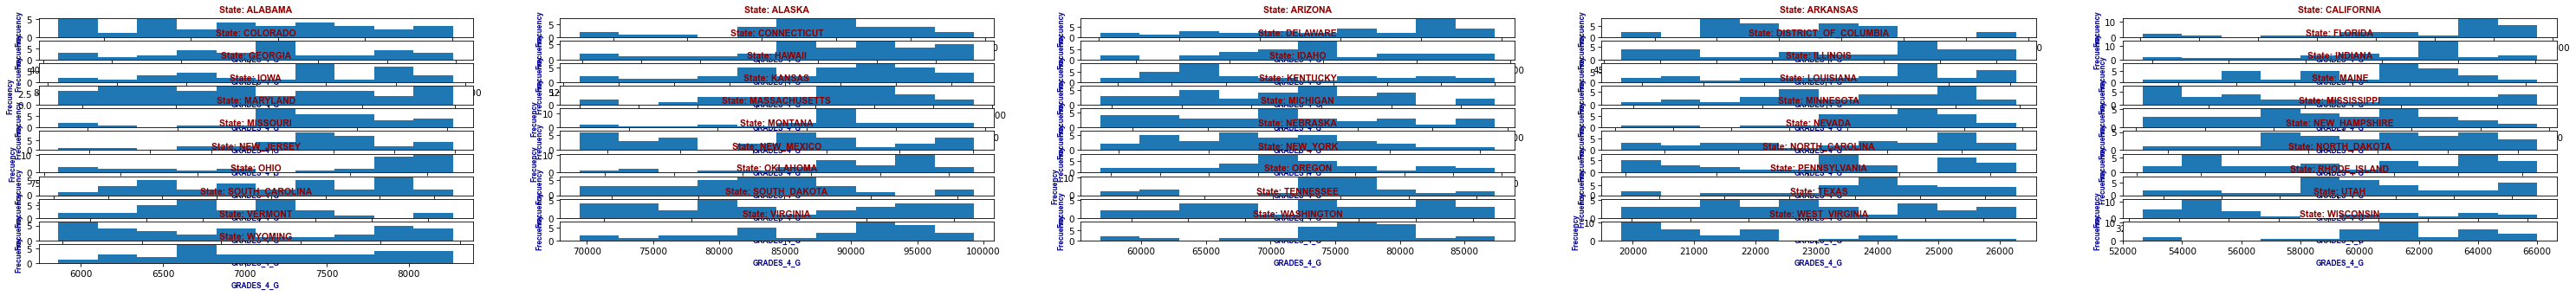

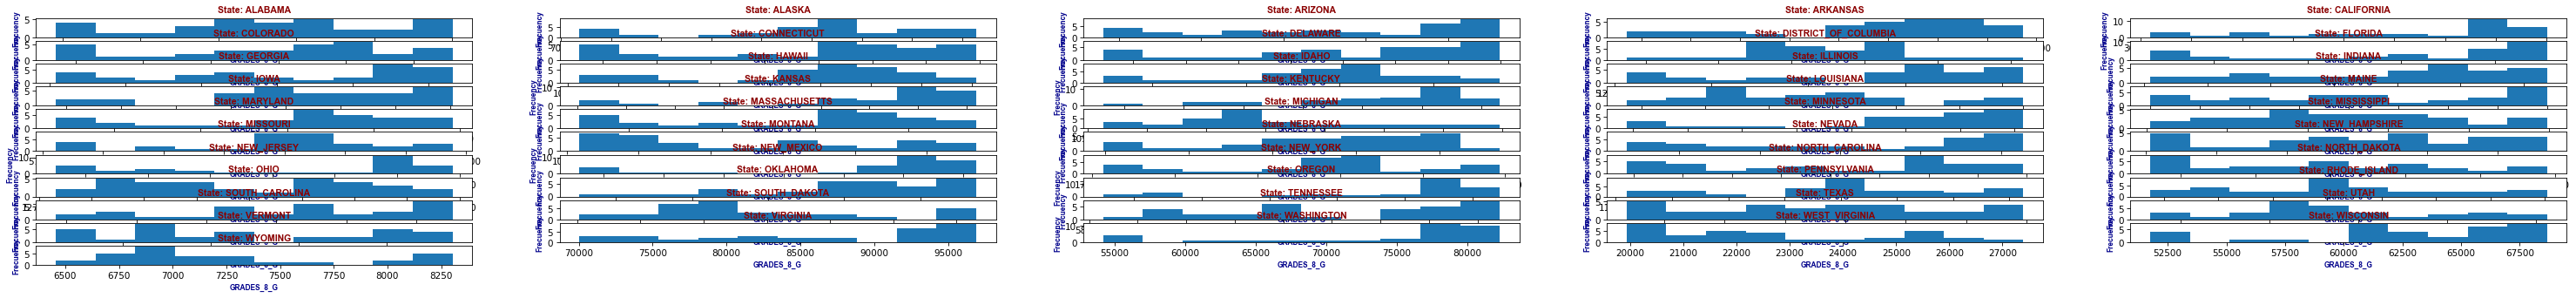

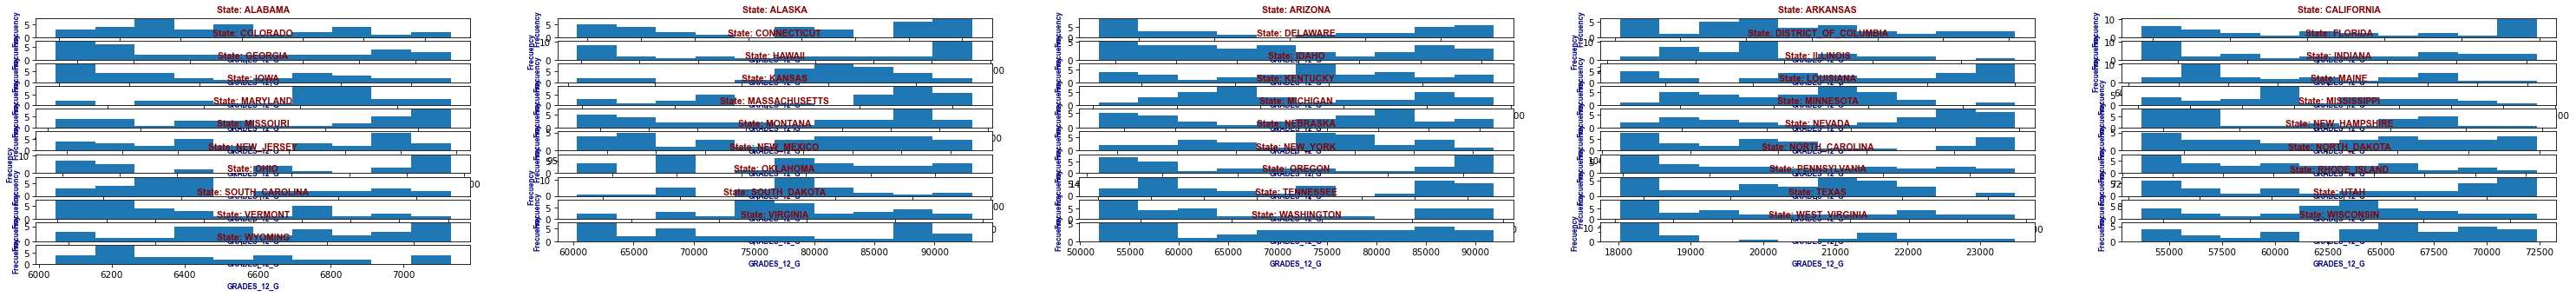

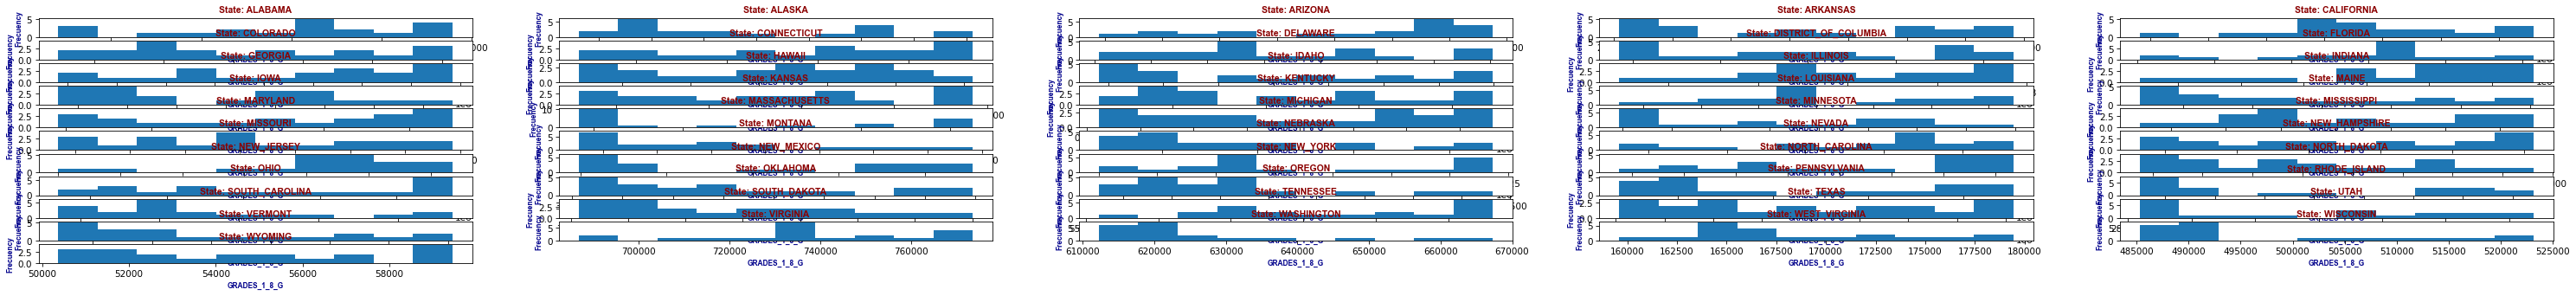

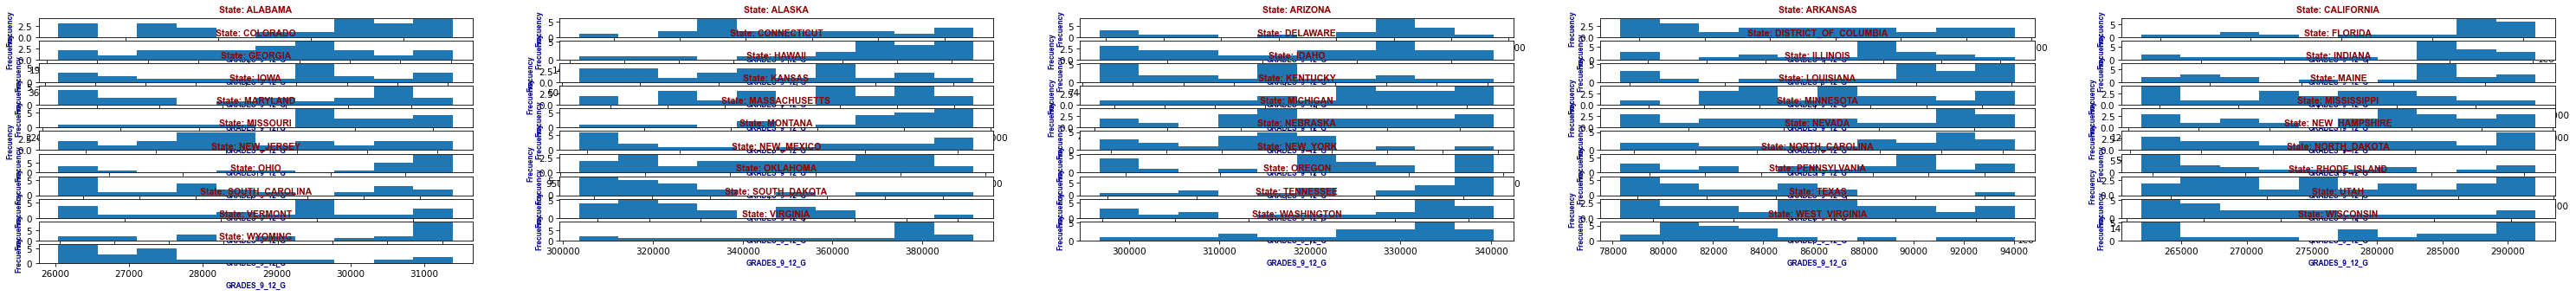

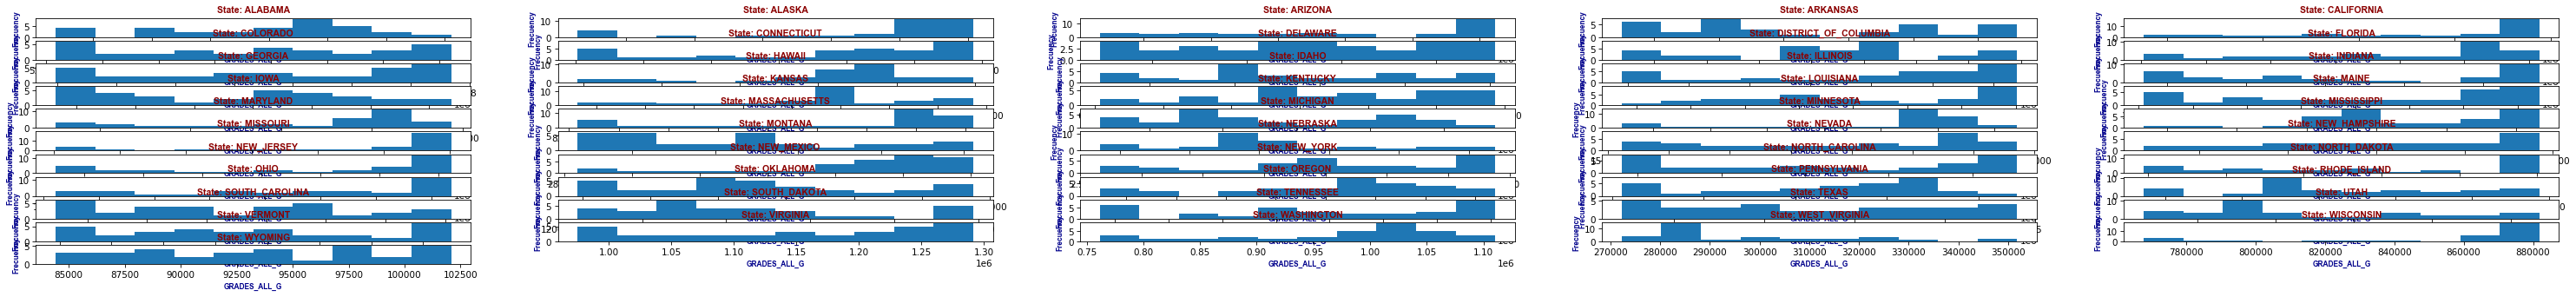

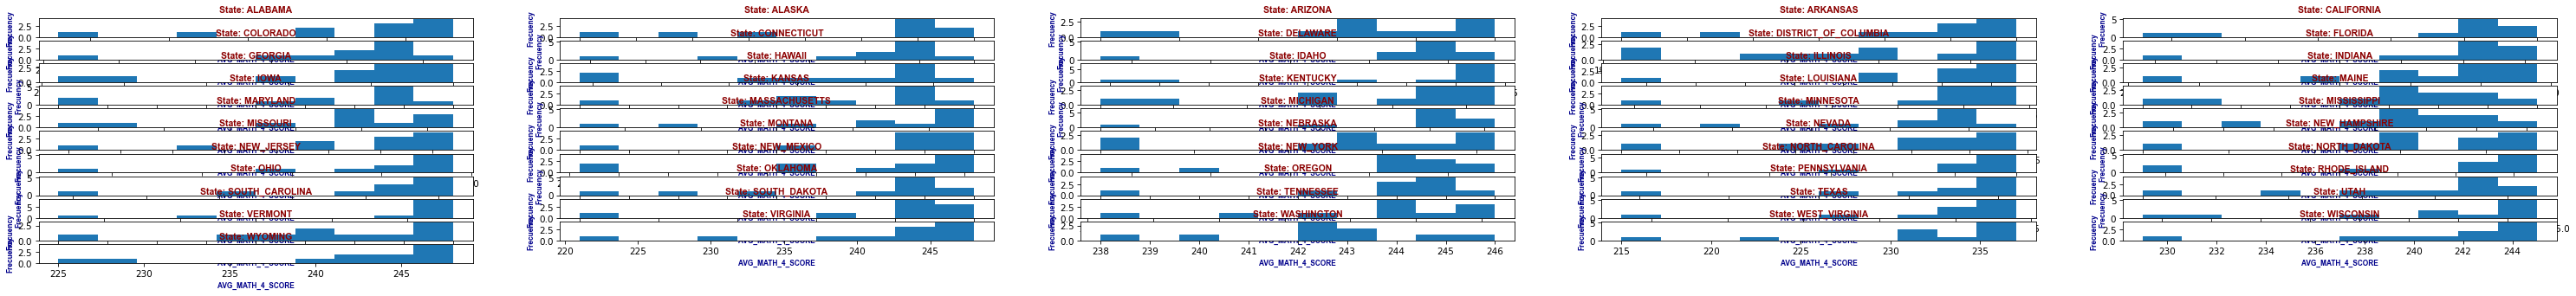

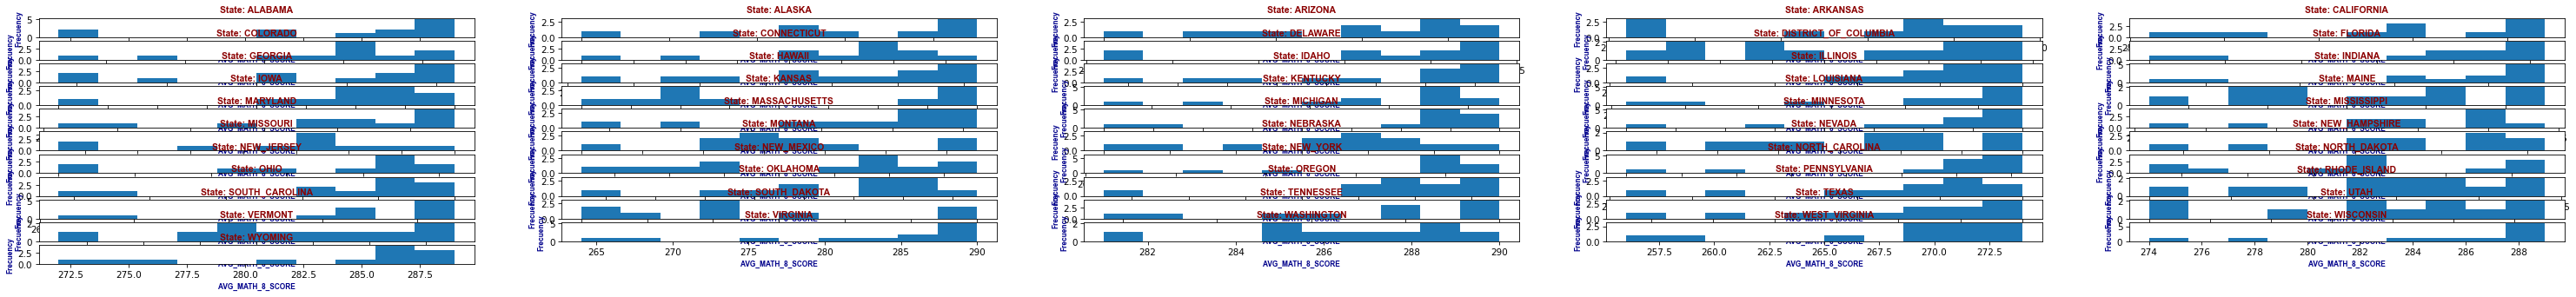

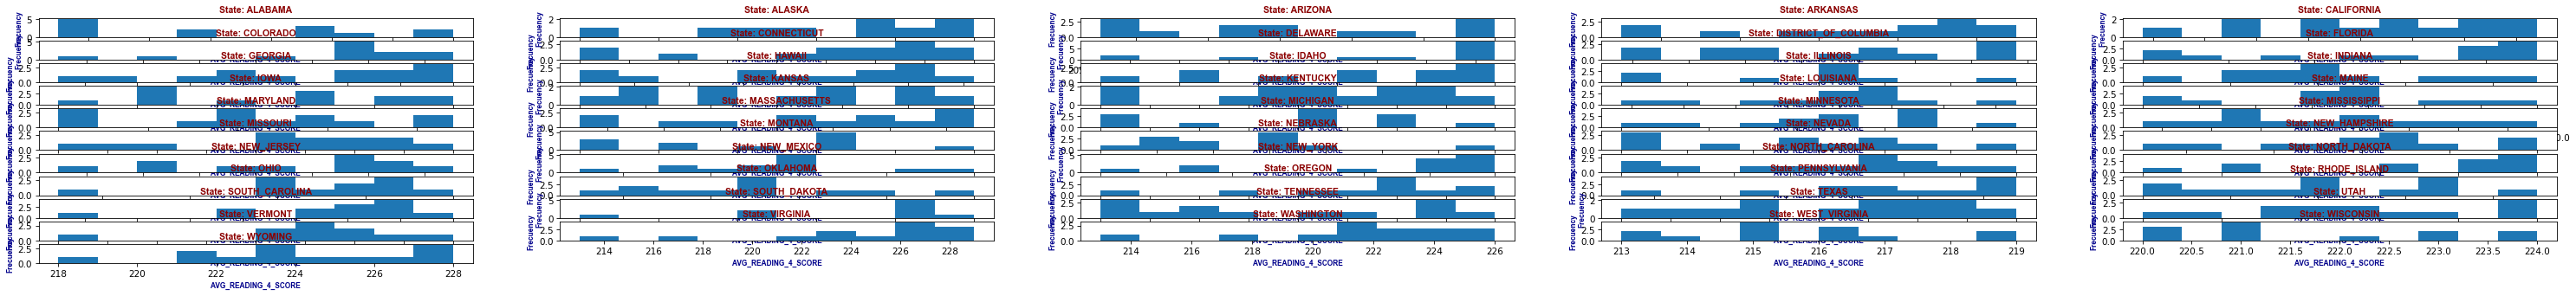

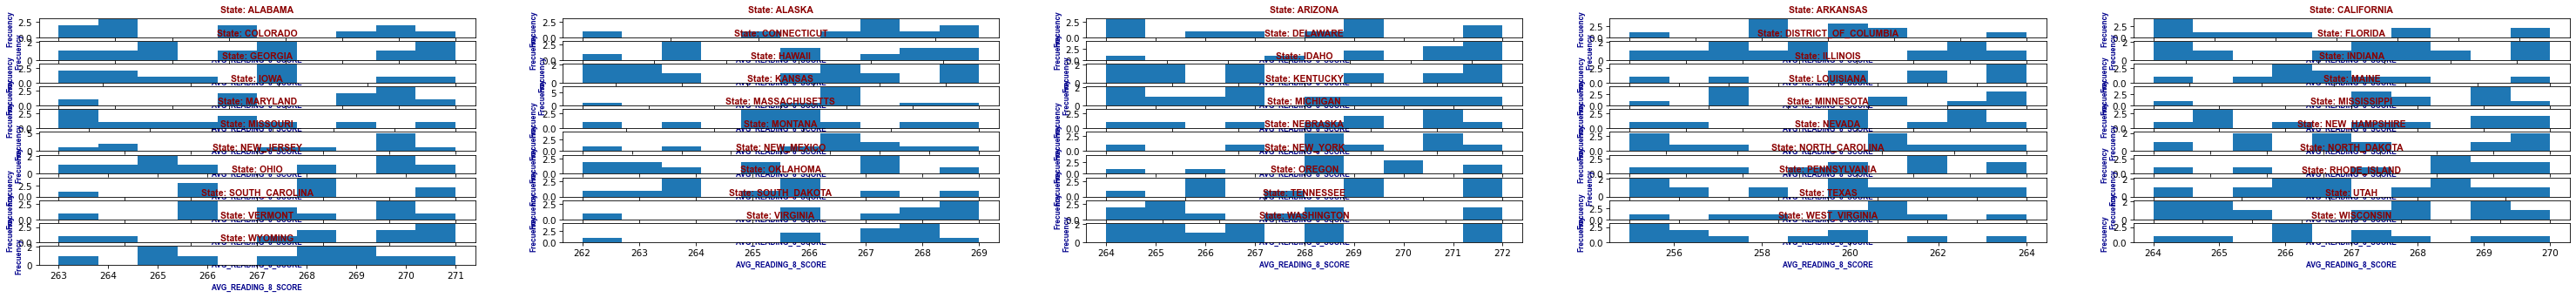

In [32]:
# Study the behaviour for each variable grouping by STATE
for i in range (3, 25):
    many_histogram_plot(states_df.columns[i], 11, 5)

In [36]:
# After studying the behaviour of each varaible, I decide to use the mean to replace the NaN values, independant for each state

for i in range(3, 25):
    states_df[states_df.columns[i]] = states_df.groupby('STATE')[states_df.columns[i]].transform(lambda x: x.fillna(x.mean()))

In [37]:
print(states_df.isnull().sum()*100/states_df.shape[0], '\n')

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          1.865889
TOTAL_REVENUE                   1.865889
FEDERAL_REVENUE                 1.865889
STATE_REVENUE                   1.865889
LOCAL_REVENUE                   1.865889
TOTAL_EXPENDITURE               1.865889
INSTRUCTION_EXPENDITURE         1.865889
SUPPORT_SERVICES_EXPENDITURE    1.865889
OTHER_EXPENDITURE               1.865889
CAPITAL_OUTLAY_EXPENDITURE      1.865889
GRADES_PK_G                     1.865889
GRADES_KG_G                     1.865889
GRADES_4_G                      1.865889
GRADES_8_G                      1.865889
GRADES_12_G                     1.865889
GRADES_1_8_G                    1.865889
GRADES_9_12_G                   1.865889
GRADES_ALL_G                    1.865889
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SC